In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Pratibha\OneDrive\Desktop\DATA SCIENCE RESOURCES\revenue-forecasting-scenario-planning\revenue-forecasting-scenario-planning\data\processed\monthly_revenue_processed_ALL_YEARS_CORRECT.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.sort_values("Date").set_index("Date")
df = df.asfreq("MS")


#### Baseline Model #1 — Naïve Forecast:
Next month = last observed month

In [3]:
train = df.loc[:'2018-12']
test = df.loc['2019-01':]


In [4]:
naive_forecast = test.copy()
naive_forecast["Forecast"] = train["Revenue"].iloc[-1]


#### Baseline Model #2 — Seasonal Naïve:
This month = same month last year

In [6]:
seasonal_naive = test.copy()
seasonal_naive["Forecast"] = df["Revenue"].shift(12).loc[test.index]


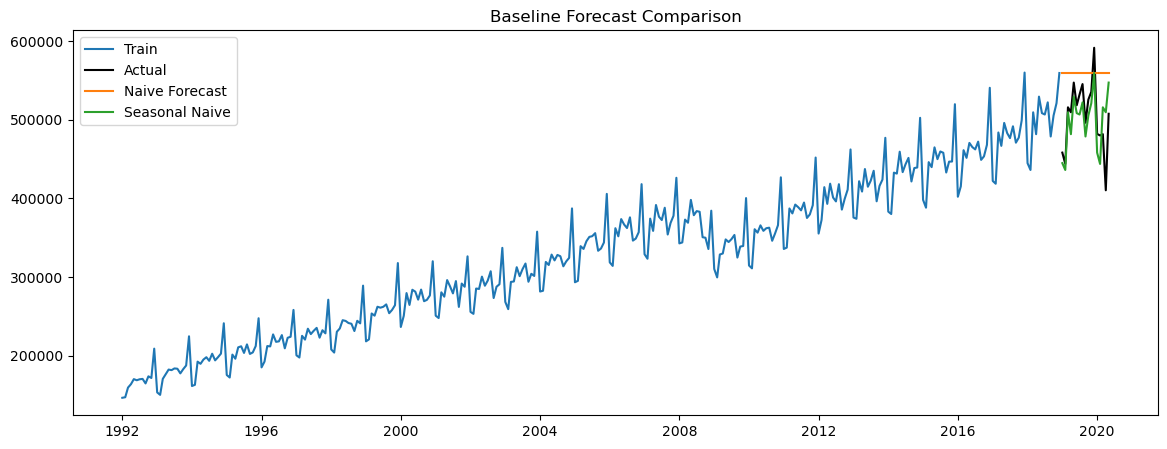

In [7]:
plt.figure(figsize=(14,5))
plt.plot(train.index, train["Revenue"], label="Train")
plt.plot(test.index, test["Revenue"], label="Actual", color="black")
plt.plot(test.index, naive_forecast["Forecast"], label="Naive Forecast")
plt.plot(test.index, seasonal_naive["Forecast"], label="Seasonal Naive")
plt.legend()
plt.title("Baseline Forecast Comparison")
plt.show()


In [8]:
from sklearn.metrics import mean_absolute_error

mae_naive = mean_absolute_error(test["Revenue"], naive_forecast["Forecast"])
mae_seasonal = mean_absolute_error(test["Revenue"], seasonal_naive["Forecast"])

mae_naive, mae_seasonal


(58422.529411764706, 26433.470588235294)

##### Interpretation

Seasonal naïve should beat naïve

Neither will handle COVID well

## Baseline Forecasting Results:
Naïve and seasonal naïve baselines were implemented to establish performance benchmarks. The seasonal naïve model significantly outperformed the flat naïve forecast by capturing recurring annual seasonality, confirming the presence of strong seasonal patterns in revenue. However, both baselines failed to adapt to structural shocks such as the COVID-19 downturn, highlighting the need for trend-aware forecasting models with uncertainty estimation.